# Overview

This notebook covers step by step process of builing a Machine Learning model to predict House price. It will also covers every important steps one need to take when building a Machine Learning model like 

    1. Undestanding the problem
    2. EDA
    3. Data Preprocessing
    4. Feature Selection  
    5. Modeling 
    6. Evaluation.

## Understanding the problem

A dataset was given which has 79 explanatory variables describing (almost) every aspect of residential homes. We need to find prices of new houses using Machine Learning. 

In [1]:
# basic library import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading our two required dataset
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's print a concise summary of our train DataFrame.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

descriptive statistics of our train set

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Feature Selection

Seperating numaric columns and categorical columns

In [7]:
numaric_cols = train.select_dtypes(exclude=['object'])
categorical_cols = train.select_dtypes(include=['object'])

In [8]:
#finding important features
correlation_num = numaric_cols.corr()
correlation_num.sort_values(["SalePrice"], ascending = False, inplace = True)
correlation_num.SalePrice
#correlation.SalePrice.plot(kind = 'bar', figsize = (20, 6));

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
#label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
cat_le = categorical_cols.apply(LabelEncoder().fit_transform)
cat_le['SalePrice'] = train['SalePrice']
#finding important features from categorical values
correlation_cat = cat_le.corr()
correlation_cat.sort_values(["SalePrice"], ascending = False, inplace = True)
correlation_cat.SalePrice

SalePrice        1.000000
Foundation       0.382479
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
Fence            0.140640
Alley            0.139868
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
Exterior2nd      0.103766
Exterior1st      0.103551
Condition1       0.091155
MiscFeature      0.073609
LandSlope        0.051152
Street           0.041036
MasVnrType       0.029658
GarageCond       0.025149
LandContour      0.015453
BsmtCond         0.015058
BsmtFinType2     0.008041
Condition2       0.007513
GarageQual       0.006861
Utilities       -0.014314
SaleType        -0.054911
LotConfig       -0.067396
BldgType        -0.085591
Heating         -0.098812
BsmtFinType1    -0.103114
PoolQC          -0.126070
MSZoning        -0.166872
LotShape        -0.255580
BsmtExposure    -0.309043
HeatingQC       -0.400178
GarageType  

Visualizing important features

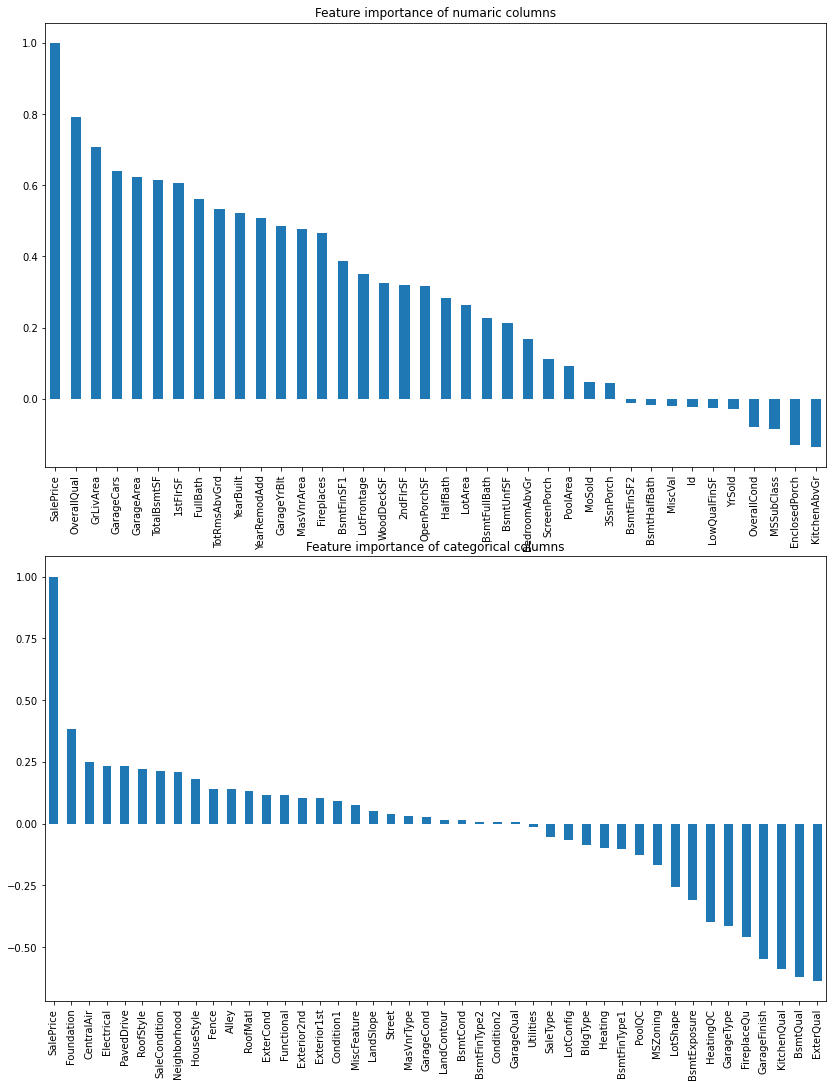

In [10]:
fig, axarr = plt.subplots(2, 1, figsize = (14, 18))
correlation_num.SalePrice.plot.bar(ax=axarr[0])
correlation_cat.SalePrice.plot.bar(ax=axarr[1])
axarr[0].set_title("Feature importance of numaric columns")
axarr[1].set_title("Feature importance of categorical columns");

# Data Preprocessing(Train set)

In [11]:
# dropping colmuns where number of null values is greater than 500
null_values = train.loc[:,train.isnull().sum()>500]
train.drop(null_values,axis=1, inplace = True)

Let's remove features with less importance. **Less important features was selected by correlation score**.

In [12]:
# list of less important features
less_important = ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
 '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure','BsmtFinType1',
 'Heating', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish','SaleType']

# dropping less important columns
train.drop(less_important, axis = 1, inplace = True)

Let's check for null values. To view the full dataset first we need to set `display.max_rows`

In [13]:
pd.set_option('display.max_rows', None)
pd.DataFrame(train.isna().sum())

,0
LotFrontage,259
LotArea,0
Neighborhood,0
Condition1,0
HouseStyle,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0
RoofStyle,0
RoofMatl,0


In [14]:
# filling null values
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['MasVnrArea'].fillna(0 , inplace = True)
train['BsmtCond'].fillna('NA' , inplace = True)
train['BsmtFinType2'].fillna('NA' , inplace = True)
train['Electrical'].fillna('SBrkr' , inplace = True)
train['GarageYrBlt'].fillna(0 , inplace = True)
train['GarageQual'].fillna('NA' , inplace = True)
train['GarageCond'].fillna('NA' , inplace = True)

Great! Null value problem solved.

# EDA

Let's first plot a scatter plot visualizing `GrLivArea` and `SalePrice`

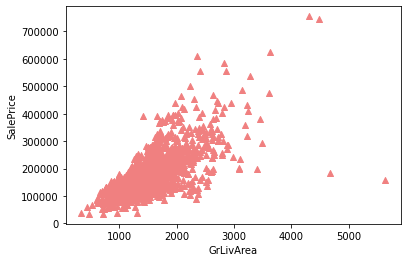

In [15]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "lightcoral", marker ="^")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

There are some odd values that saying Ground living area is bigger than `4000`. We will treat them as outliers. 

In [16]:
#removing outliers
train = train[train.GrLivArea < 4000]

Let's plot another scatter plot visualizing `LotArea` and `SalePrice`

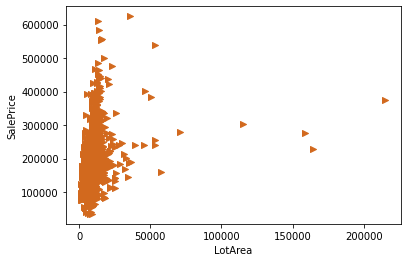

In [17]:
plt.scatter(train.LotArea, train.SalePrice, c = "chocolate", marker =">")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

We will consider `LotArea` greater than `150000` as outliers.

In [18]:
#removing outliers
train = train[train.LotArea < 150000]

Another scatter plot of `LotFrontage` w.r.t `SalePrice`

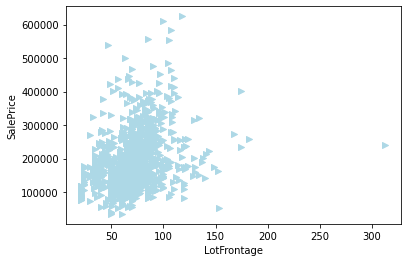

In [19]:
plt.scatter(train.LotFrontage, train.SalePrice, c = "lightblue", marker =">")
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

`OverallQual` refers overall quality of the house. This is a important feature. SalePrice largly depends on it. Because if the house quality is `Very Excellent` than it is more likely to be sold with high price. Let's analyse this column.

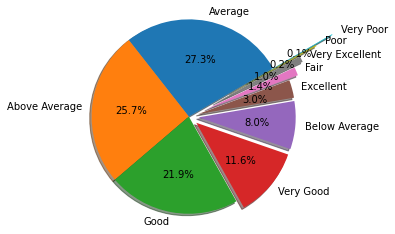

In [20]:
labels = 'Average', 'Above Average', 'Good', 'Very Good', 'Below Average','Excellent', 'Fair', 'Very Excellent', 'Poor', 'Very Poor' 
explode = (0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.5, 0.7)

fig1, ax1 = plt.subplots()
ax1.pie(train['OverallQual'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

`27.3%` houses of the train dataset has `Average` quality. And `0.1%` houses are `Very Poor` in quality.

Let's see the `SalePrice` variation w.r.t `OverallQual`

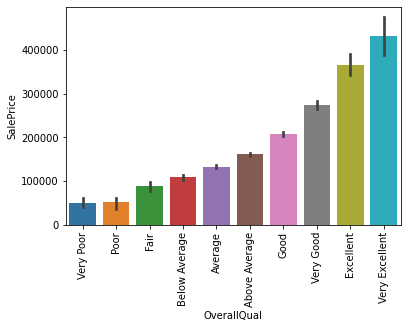

In [21]:
fig = sns.barplot(x = 'OverallQual',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent'], rotation=90);

`Foundation` is another important feature. It represent how strong a bulding can be. Buildings life depends on it. So, this column worth analysing.

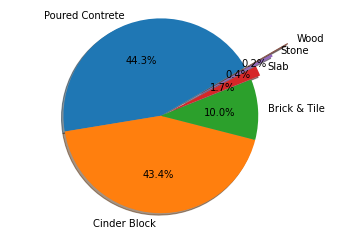

In [22]:
labels = 'Poured Contrete', 'Cinder Block', 'Brick & Tile', 'Slab', 'Stone', 'Wood'
explode = (0, 0.0, 0.0, 0.1, 0.3, 0.5)

fig1, ax1 = plt.subplots()
ax1.pie(train['Foundation'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

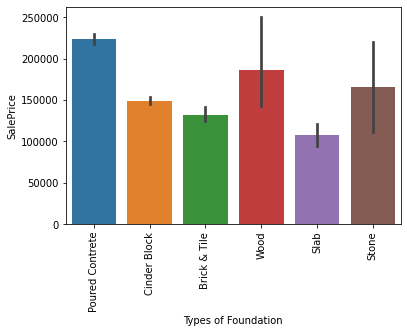

In [23]:
fig = sns.barplot(x = 'Foundation',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['Poured Contrete', 'Cinder Block', 'Brick & Tile', 'Wood', 'Slab', 'Stone'], rotation=90)
plt.xlabel("Types of Foundation");

Let's see how `SalePrice` varies w.r.t `GarageCars`

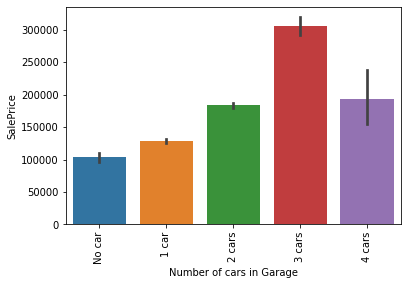

In [24]:
fig = sns.barplot(x = 'GarageCars',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['No car', '1 car', '2 cars', '3 cars', '4 cars'], rotation=90)
plt.xlabel("Number of cars in Garage");

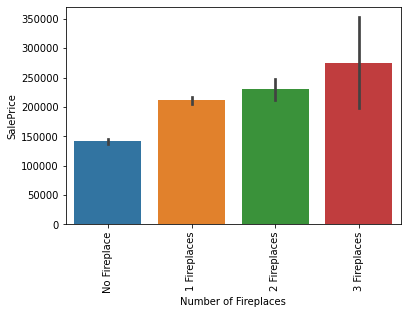

In [25]:
fig = sns.barplot(x = 'Fireplaces',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['No Fireplace', '1 Fireplaces', '2 Fireplaces', '3 Fireplaces'], rotation=90)
plt.xlabel("Number of Fireplaces");

Let's plot a distribution plot of `YearBuilt` column representing the year of a house was bult w.r.t saleprice

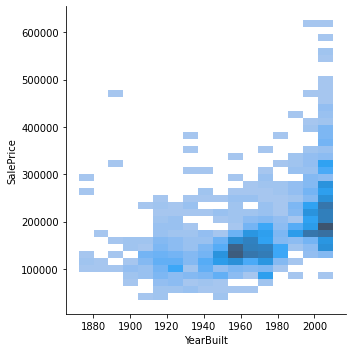

In [26]:
sns.displot(x = 'YearBuilt', y = 'SalePrice', data = train);

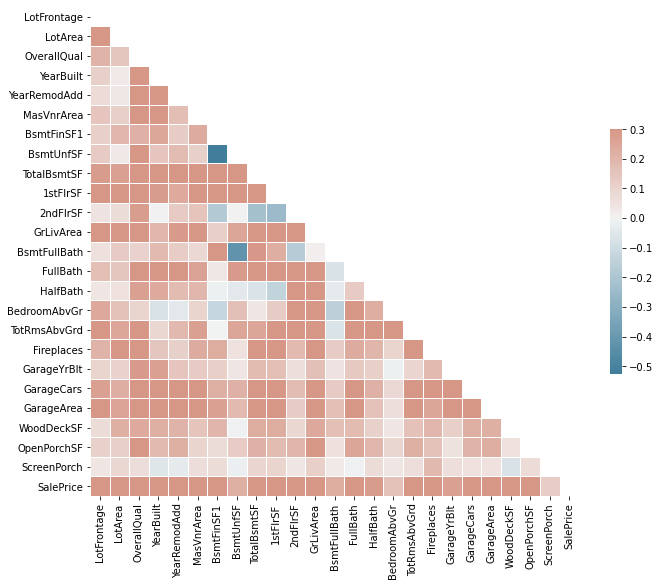

In [27]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Feature Engineering

#### Reducing `Skewness` and `kurtosis` from data.

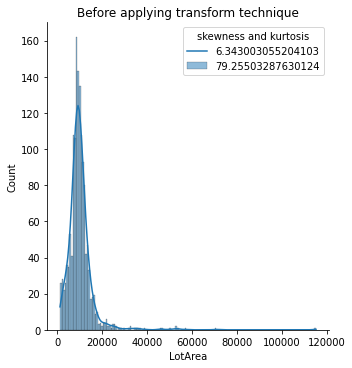

In [28]:
sns.displot(x = 'LotArea', data = train, kde = True)
skewness=str(train["LotArea"].skew())
kurtosis=str(train["LotArea"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Before applying transform technique")
plt.show()

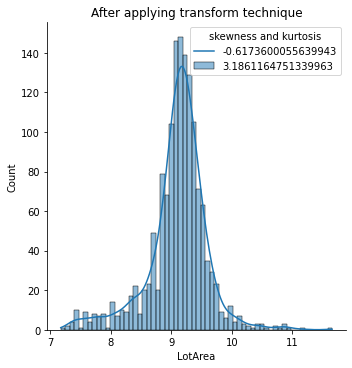

In [29]:
#applying log transform
train['LotArea']=np.log(train['LotArea'])
sns.displot(x = 'LotArea', data = train, kde = True)
skewness=str(train["LotArea"].skew())
kurtosis=str(train["LotArea"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("After applying transform technique")
plt.show()

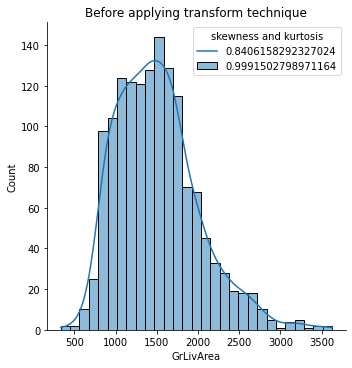

In [30]:
sns.displot(x = 'GrLivArea', data = train, kde = True)
skewness=str(train["GrLivArea"].skew())
kurtosis=str(train["GrLivArea"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Before applying transform technique")
plt.show()

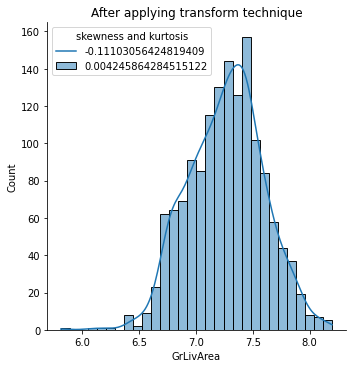

In [31]:
train['GrLivArea']=np.log(train['GrLivArea'])
sns.displot(x = 'GrLivArea', data = train, kde = True)
skewness=str(train["GrLivArea"].skew())
kurtosis=str(train["GrLivArea"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("After applying transform technique")
plt.show()

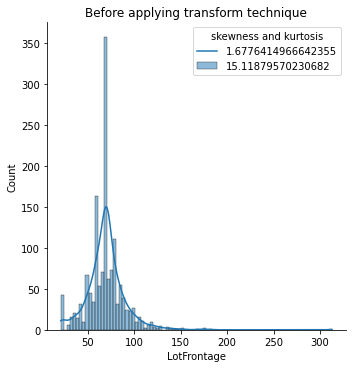

In [32]:
sns.displot(x = 'LotFrontage', data = train, kde = True)
skewness=str(train["LotFrontage"].skew())
kurtosis=str(train["LotFrontage"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Before applying transform technique")
plt.show()

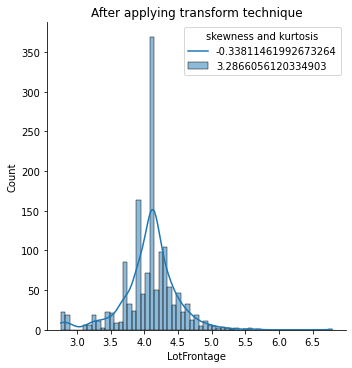

In [33]:
train['LotFrontage'] = np.cbrt(train['LotFrontage'])
sns.displot(x = 'LotFrontage', data = train, kde = True)
skewness=str(train["LotFrontage"].skew())
kurtosis=str(train["LotFrontage"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("After applying transform technique")
plt.show()

# Modeling

It's time to create our independent and dependent matrix of feature.

In [34]:
x = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

In [35]:
#labelencoding categorical variables from x
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)

In [36]:
x.head()

,LotFrontage,LotArea,Neighborhood,Condition1,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleCondition
0,36,327,5,2,5,6,104,53,1,0,...,90,2,220,5,5,2,0,49,0,4
1,52,498,24,1,2,5,77,26,1,0,...,63,2,149,5,5,2,187,0,0,4
2,39,702,5,2,5,6,102,52,1,0,...,88,2,260,5,5,2,0,30,0,4
3,31,489,6,2,5,6,19,20,1,0,...,85,3,284,5,5,2,0,24,0,0
4,56,925,15,2,5,7,101,50,1,0,...,87,3,378,5,5,2,118,70,0,4


In [37]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [38]:
x.shape, y.shape

((1453, 42), (1453,))

In [39]:
#splitting the dataset into train and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 31)

In [40]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1089, 364, 1089, 364)

In [41]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [42]:
#model evaluation function
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

def model_evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mae
    

# Lasso

In [43]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1, random_state = 32).fit(x_train, y_train)
cv_r2 = cross_val_score(lasso_reg, x_train, y_train, cv = 10)
y_preds = lasso_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8278706401045717
R^2 score: 0.8563418920151011
Mean Absolute Erro: 19920.254536806577


# Ridge

In [44]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5).fit(x_train, y_train)
cv_r2 = cross_val_score(ridge_reg, x_train, y_train, cv = 10)
y_preds = ridge_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8279207755115884
R^2 score: 0.8563675882488648
Mean Absolute Erro: 19915.71950193997


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train)
cv_r2 = cross_val_score(rf_reg, x_train, y_train, cv = 10)
y_preds = rf_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8689307238336397
R^2 score: 0.8966442957076054
Mean Absolute Erro: 15891.276332548405


# GradientBoostingRegressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=31).fit(x_train, y_train)
cv_r2 = cross_val_score(gbr_reg, x_train, y_train, cv = 10)
y_preds = gbr_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8583668798091466
R^2 score: 0.8697009470457316
Mean Absolute Erro: 18272.807911483636


# Xgboost

In [47]:
import xgboost as XGB
xgb = XGB.XGBRegressor(learning_rate=0.01, n_estimators=1000, objective='reg:squarederror', random_state = 31).fit(x_train, y_train)
cv_r2 = cross_val_score(xgb, x_train, y_train, cv = 10)
y_preds = xgb.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8831317673109684
R^2 score: 0.9073262243944158
Mean Absolute Erro: 15173.665135645604


# Preparing test set

In [48]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Less drop less important featues and columns with null values > 500 

In [49]:
null_values = test.loc[:, test.isnull().sum()>500]
test.drop(null_values, axis=1, inplace = True)

test.drop(less_important, axis = 1, inplace = True)

In [50]:
#checking for null values in test set
pd.DataFrame(test.isna().sum())

,0
LotFrontage,227
LotArea,0
Neighborhood,0
Condition1,0
HouseStyle,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0
RoofStyle,0
RoofMatl,0


In [51]:
# taking care of null values
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace = True)
test['MasVnrArea'].fillna(0 , inplace = True)
test['BsmtCond'].fillna('NA' , inplace = True)
test['BsmtFinType2'].fillna('NA' , inplace = True)
test['Electrical'].fillna('SBrkr' , inplace = True)
test['GarageYrBlt'].fillna(0 , inplace = True)
test['GarageQual'].fillna('NA' , inplace = True)
test['GarageCond'].fillna('NA' , inplace = True)
test['Exterior1st'].fillna('VinylSd' , inplace = True)
test['Exterior2nd'].fillna('VinylSd' , inplace = True)
test['BsmtFinSF1'].fillna(0 , inplace = True)
test['BsmtUnfSF'].fillna(0 , inplace = True)
test['TotalBsmtSF'].fillna(0 , inplace = True)
test['BsmtFullBath'].fillna(0 , inplace = True)
test['Functional'].fillna('Typ' , inplace = True)
test['GarageCars'].fillna(0 , inplace = True)
test['GarageArea'].fillna(0, inplace = True)

In [52]:
#reducing Skewness and kurtosis
test['LotFrontage'] = np.cbrt(test['LotFrontage'])
test['GrLivArea']=np.log(test['GrLivArea'])
test['LotArea']=np.log(test['LotArea'])

In [53]:
#labelencoding test data
test = test.apply(LabelEncoder().fit_transform)

In [54]:
#scaling test data
test = scale.transform(test)

In [55]:
#making prediction
predictions = xgb.predict(test)

### Creating submission file for Kaggle

In [56]:
sample_sub = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
final_data = {'Id': sample_sub.Id, 'SalePrice': predictions}
final_submission = pd.DataFrame(data=final_data)
final_submission.to_csv('submission_file.csv',index =False)